# Applying 2D-CNN to our sample dataset 

## Dumped data directories

In [6]:
import os, shutil
%env TP_ISAE_DATA= ./data/`
data_dir = os.path.join(os.environ.get("TP_ISAE_DATA"),"dataset")
aircraft_dir = os.path.join(data_dir,"aircraft")
background_dir = os.path.join(data_dir,"background")

env: TP_ISAE_DATA=./data/`


### Some visualization

There are 10 planes
Show plane #7 : 


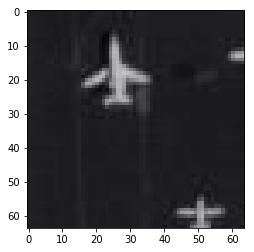

In [21]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

#visualization of a plane sample randomly
fnames = os.listdir(aircraft_dir)
n_planes = len(fnames)
print("There are {} planes".format(n_planes))

p = np.random.randint(0,n_planes-1)
print("Show plane #{} : ".format(p))
img = mpimg.imread(os.path.join(aircraft_dir,fnames[p]))
imgplot = plt.imshow(img)

## Creating a convolutional network

In [1]:
import keras
from keras import layers
from keras import models

Using TensorFlow backend.


In [2]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [3]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

### Data preprocessing

In [9]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(64, 64),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')


Found 4000 images belonging to 2 classes.


### Running the model

In [10]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=train_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 12s 124ms/step - loss: 0.0443 - acc: 0.9985 - val_loss: 0.0319 - val_acc: 0.9980
Epoch 2/30
100/100 [==============================] - 5s 47ms/step - loss: 0.0558 - acc: 0.9965 - val_loss: 0.0319 - val_acc: 0.9980
Epoch 3/30
100/100 [==============================] - 5s 47ms/step - loss: 0.0558 - acc: 0.9965 - val_loss: 0.0159 - val_acc: 0.9990
Epoch 4/30
100/100 [==============================] - 5s 47ms/step - loss: 0.0159 - acc: 0.9990 - val_loss: 0.0957 - val_acc: 0.9940
Epoch 5/30
100/100 [==============================] - 5s 47ms/step - loss: 0.0319 - acc: 0.9980 - val_loss: 0.0319 - val_acc: 0.9980
Epoch 6/30
100/100 [==============================] - 5s 47ms/step - loss: 0.0717 - acc: 0.9955 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7/30
100/100 [==============================] - 5s 47ms/step - loss: 0.0399 - acc: 0.9975 - val_loss: 0.0797 - val_acc: 0.9950
Epoch 8/30
100/100 [==============================] - 5s 47ms/s

In [ ]:
model.save(aircraft_background.h5)